# Sprint 5 - Integrated Project

I work for an online store called Ice, which sells video games all over the world. User and expert reviews, genres, platforms, and historical data on game sales are available from open sources. In this project I will identify patterns that determine whether a game succeeds or not. This will allow me to analyze market trends and plan advertising campaigns. I have been provided data going back to 2016, and I'm planning a campaign for 2017.

To complete this project and plan a campaign for 2017, I will work through the following steps:

**Step 1.** Open the data file and study the general information

**Step 2.** Prepare the data
- Replace column names
- Convert the data types
- Replace missing values
- Calculate the total sales for each game and add it to the dataset

**Step 3.** Analyze the data in a variety of ways. For example,
- Look at how many games were released in different years. Is the data for every period significant?
- Look at how sales varied from platform to platform
- Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales.
- Look at platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?
- Determine what period data should be taken for based on the above results, and build a model for 2017, disregarding irrelevant data.
- Which platforms are leading in sales and which are growing/shrinking? Select several potentially profitable platforms.
- Build a box plot for global sales of all games by platform. Are there significant differences in sales or average sales?
- How do user and professional reviews affect sales for one of the popular platforms? Show a scatter plot and calculate correlation.
- Compare sales of the same games on different platforms.
- What are the most profitable genres? Discuss genres with high and low sales generally.

**Step 4.** Create a user profile for each region (NA, EU, JP) and determine:
- The top five platforms and describe variations in their market shares from region to region.
- The top five genres and explain the difference.
- Do ESRB ratings affect sales in individual regions?

**Step 5.** Statistically test the following hypotheses:
- Average user ratings of the Xbox One and PC platforms are the same.
- Average user ratings for the Action and Sports genres are different.

## Import Libraries

In [1]:
# Import libraries required for the analysis
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
from scipy import stats as st
import seaborn as sns

# Always show all columns when displaying dataframes
pd.set_option('display.max_columns', None)

## Read and Create Dataset

In [2]:
# Read data csv and create dataframe
games = pd.read_csv('games.csv')

### Description of fields in dataset

- Name - Name of game
- Platform - Platform game was released on
- Year_of_Release - Year of game release
- Genre - Genre of game
- NA_sales - North American sales in USD million
- EU_sales - sales in Europe in USD million
- JP_sales - sales in Japan in USD million
- Other_sales - sales in other countries in USD million
- Critic_Score - critic rating out of a maximum of 100
- User_Score - user rating out of a maximum of 10
- Rating (ESRB) - The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

*Data for 2016 may be incomplete.*

### Definition of platform abbreviations (and their manufacturers) in dataset

- 2600 - 2600 (Atari)
- 3DO - 3DO (The 3DO Company)
- 3DS - 3DS (Nintendo)
- DC - Dreamcast (Sega)
- DS - DS (Nintendo)
- GB - Game Boy (Nintendo)
- GBA - Game Boy Advance (Nintendo)
- GC - GameCube (Nintendo)
- GEN - Genesis (Sega)
- GG - Game Gear (Sega)
- N64 - Nintendo 64 (Nintendo)
- NES - Nintendo Entertainment System (Nintendo)
- NG - Neo Geo (SNK Corporation)
- PC - Personal Computer (Multiple)
- PCFX - PC-FX (NEC, Hudson Soft)
- PS - PlayStation (Sony)
- PS2 - PlayStation 2 (Sony)
- PS3 - PlayStation 3 (Sony)
- PS4 - PlayStation 4 (Sony)
- PSP - PlayStation Portable (Sony)
- PSV - PlayStation Vita (Sony)
- SAT - Saturn (Sega)
- SCD - Sega CD (Sega)
- SNES - Super Nintendo Entertainment System (Nintendo)
- TG16 - TurboGrafx-16 (NEC, Hudson Soft)
- Wii - Wii (Nintendo)
- WiiU - Wii U (Nintendo)
- WS - WonderSwan (Bandai)
- X360 - Xbox 360 (Microsoft)
- XB - Xbox (Microsoft)
- XOne - Xbox One (Microsoft)

### Overview of the dataset before manipulation

In [3]:
# Print overview of dataframe and first 10 rows before we make any changes to it
games.info()
games.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


## Prepare the Data For Analysis

### Change column names to lower case

In [4]:
# Convert column names to lowercase
games.columns = [x.lower() for x in games.columns]

### Convert data types

The fields below must have their data types converted for this analysis. I've provided a justification of why and how each needs to be converted.

- **year_of_release** - Currently a float, but needs to be converted to an integer to drop the decimal place then converted to a string so that I can fill missing values with 'Unknown'.
- **user_score** - Currently an object between 0 and 10 with a decimal place. Needs to first be converted to a float then multiplied by 10 to match the critic score which is out of 100.

While *user_score* and *critic_score* are whole numbers, for ease of analysis and replacing null values, these values will be converted to numeric data types instead of objects (int/float).

In [5]:
# Convert data types as described above
games['year_of_release'] = games['year_of_release'].astype('Int64')
games['user_score'] =  pd.to_numeric(games['user_score'], errors='coerce')

# Multiply user score score by 10 to match scale of critic score and convert to integer 
games['user_score'] = games['user_score'].apply(lambda x: x*10).astype('Int64')

# Verify the changes 
games.info()
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   Int64  
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,<NA>,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,<NA>,NaN


### Fill in missing values

There are missing values in fields name, year_of_release, genre, critic_score, user_score, rating. Below is a description of how I will handle filling each of these values:

- name - There are two rows where the name is null. These two rows don't have a genre, critic score, user score, or rating. For now, I will replace name with 'Unknown'
- year_of_release - While some of the game titles have the year in it, there are still missing values in the year or release. For games with a missing year of release, I will replace those values with 0, which will denote an unknown year of release.
- genre - There are two rows where the genre is null. These two rows don't have a genre, critic score, user score, or rating. For now, I will replace name with 'Unknown'
- critic_score - Replace critic score with 0 which will represent that the game doesn't have a critic score.
- user_score - Replace user score with 0 which will represent that the game doesn't have a user score.
- rating - Replace rating with Unknown which will represent that the game doesn't have a rating.

In the next cell, you will find the code used to fill the missing values in these fields.

Some potential reasons for why these values I listed above might be missing could be because:

- The games were released years prior to the ratings/rankings list being created
- There isn't enough popularity for a particular game to be rated by users or critics
- TBD in user_score will be replaced with a 0 and will be handled similiarly to user scores without a value. I will assume that there is no score and for that reason the value will be replaced with 0 which will capture all missing or to be determined scores.

In [6]:
# Fill missing values for name, genre, and rating with 'Unknown'
games.fillna({'name':'Unknown','genre':'Unknown','rating':'Unknown'},inplace=True)

# Fill missing values for year_of_release, critic_score, and user_score with 0
games.fillna({'year_of_release':0,'critic_score':0,'user_score':0},inplace=True)

# Verify all missing values have been removed
games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### Calculate total sales and add to the dataset

Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column called total_sales

In [7]:
# Create a column called total_sales which is the sum of na_sales, eu_sales, jp_sales, and other_sales
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
 
# Check for new total_sales column
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0,Unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0.0,0,Unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,85,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,66,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,84,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0.0,0,Unknown,28.31


## Analyze the Data

In this section, I will analyze the data in a variety of ways and provide conclusions about the data.

### Look at how many games were released in different years. Is the data for every period significant?

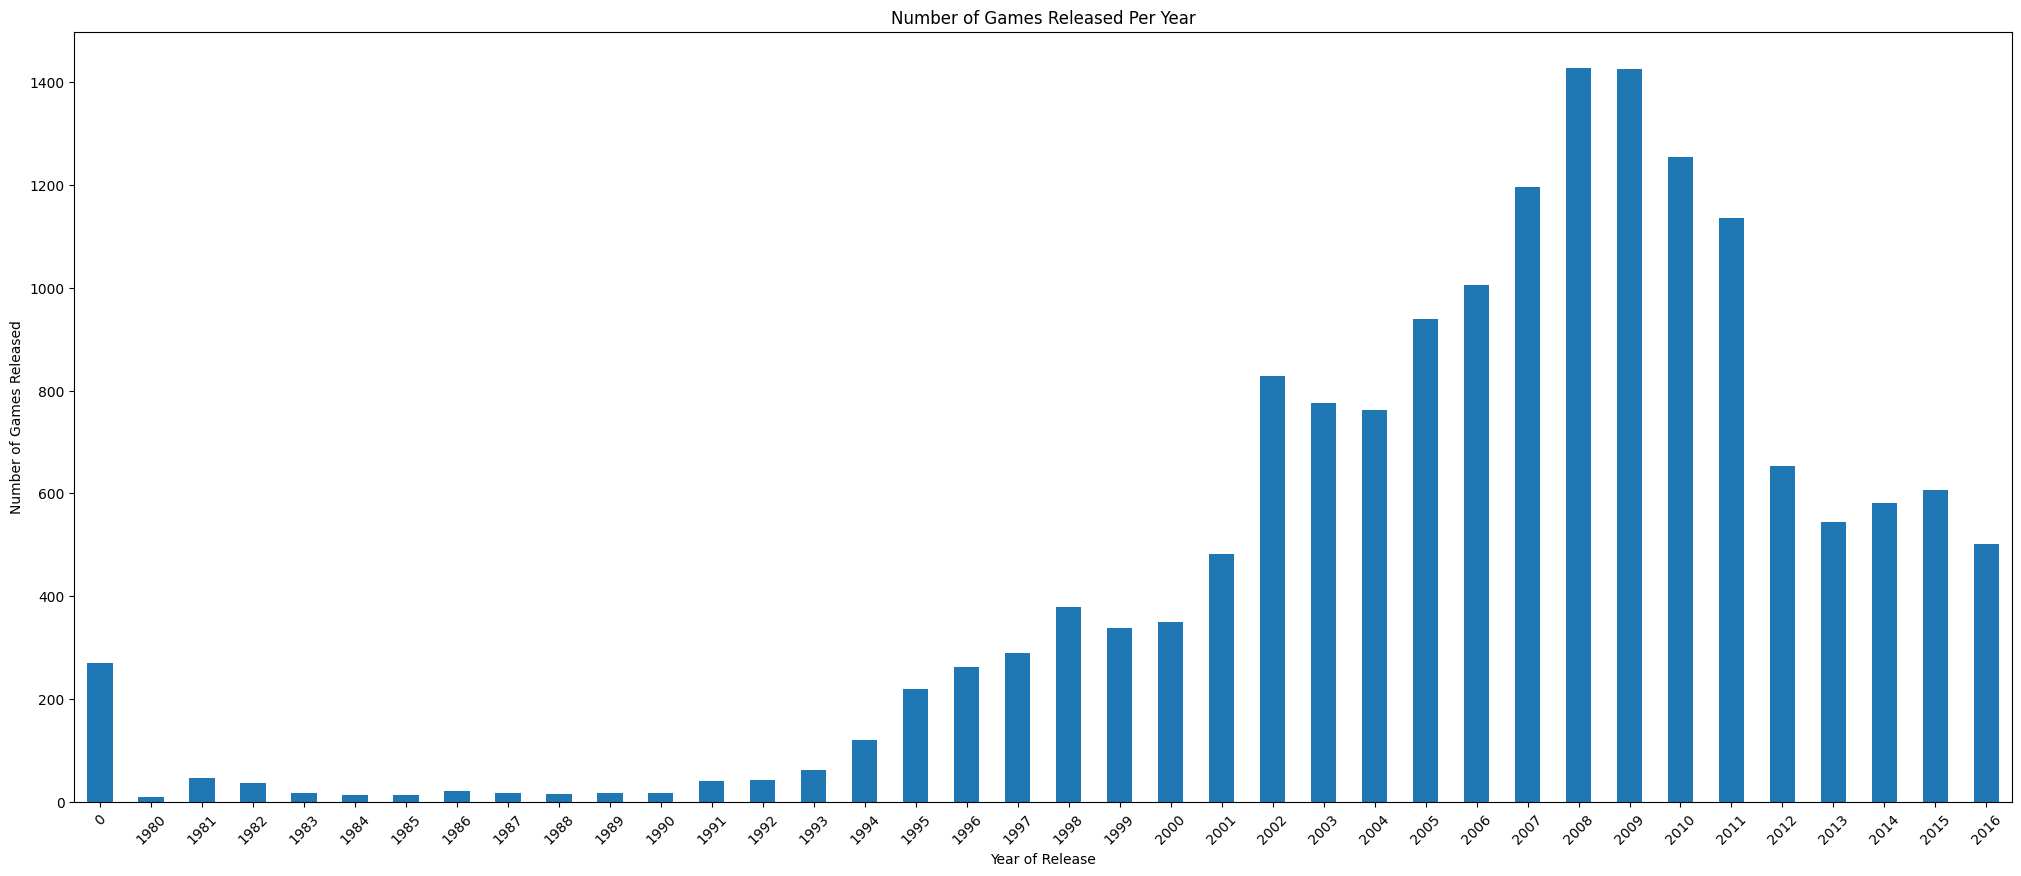

In [8]:
# Create data frame that groups the count of games by year of release
games_by_year = games.groupby('year_of_release')['name'].count().to_frame('count_of_games').reset_index()

# Create a bar chart that shows the count of games released per year
games_by_year.plot(x = 'year_of_release'
                   , y = 'count_of_games'
                   , title = 'Number of Games Released Per Year'
                   , xlabel = 'Year of Release'
                   , ylabel = 'Number of Games Released'
                   , kind = 'bar'
                   , rot = 45
                   , figsize=(25,10)
                   )

# Hide legend as it isn't necessary
plt.legend().set_visible(False)

# Show bar chart
plt.show() 

The greatest number of games were released from 2002 through 2011. There was a steady decline in games released after 2011, however, the lowest number of release games was in the 1980s. Game releases increased after 1990, finally peaking in 2008/2009.

Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

### Look at how sales varied from platform to platform

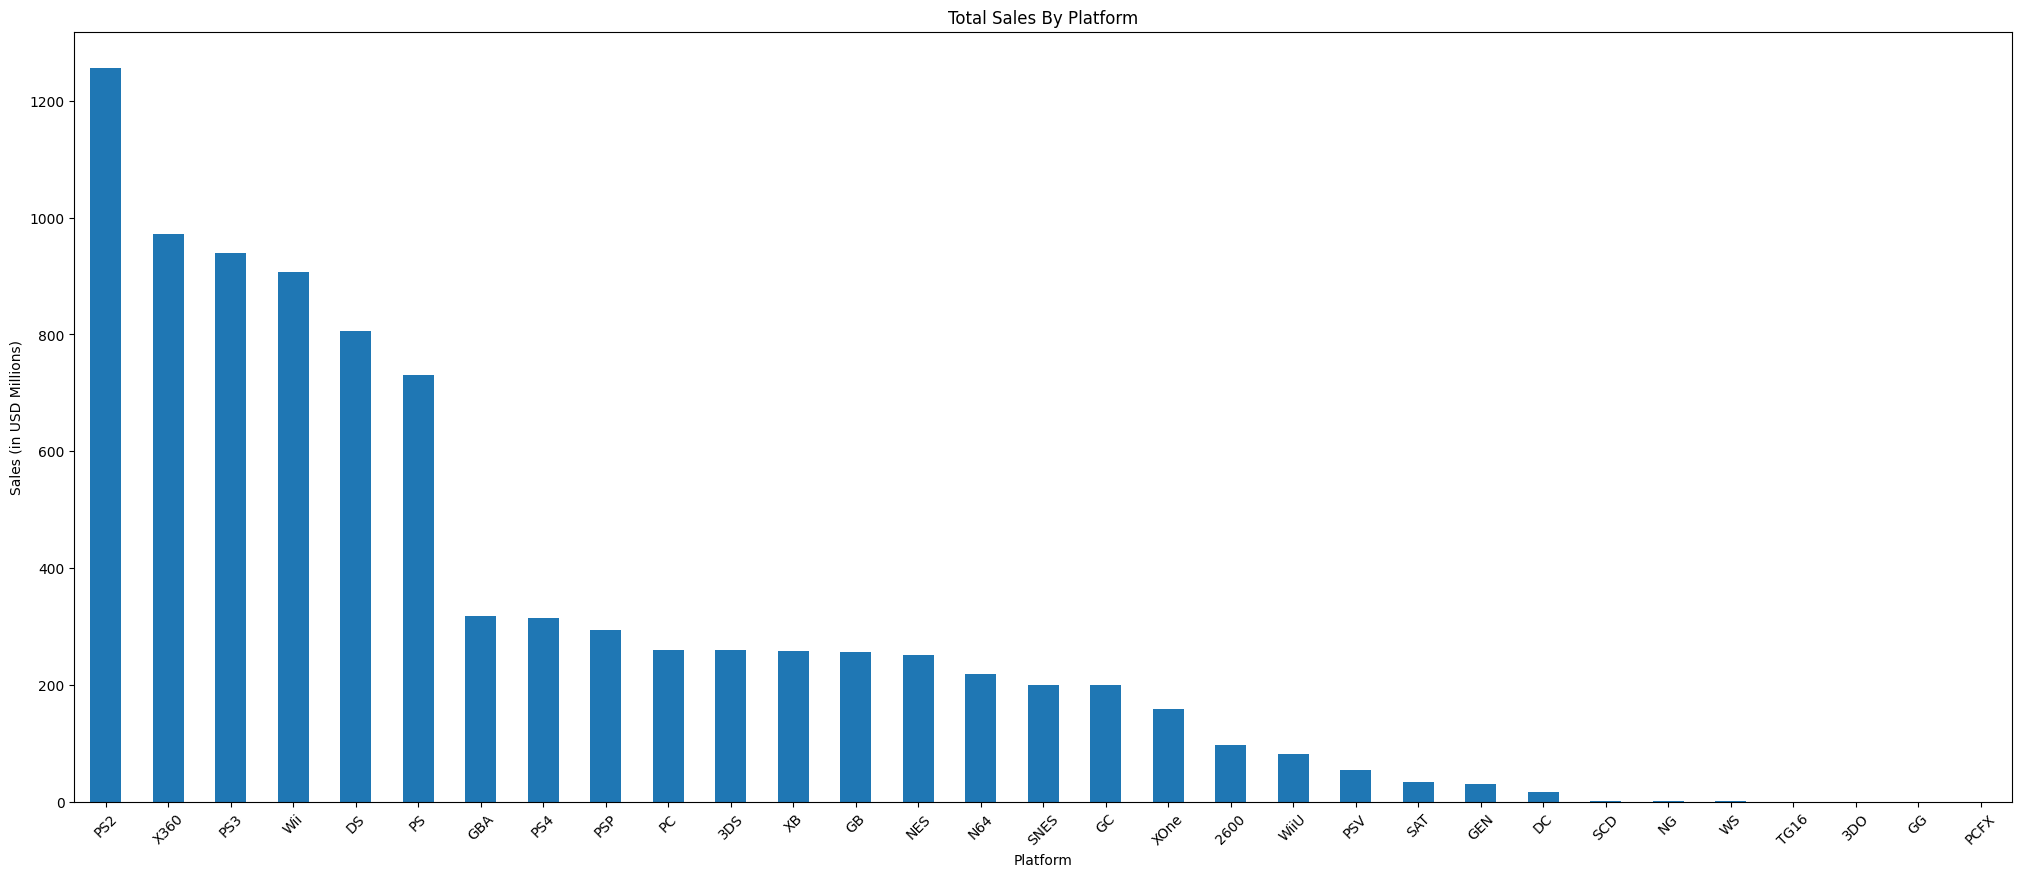

In [9]:
# Create data frame that groups the sum of total sales by platform order by sales in descending order
sales_by_platform = games.groupby('platform')['total_sales'].sum().to_frame('total_sales_by_platform').sort_values(by=['total_sales_by_platform'], ascending=False).reset_index()

# Create a bar chart that shows the sales by platform 
sales_by_platform.plot(x = 'platform'
                   , y = 'total_sales_by_platform'
                   , title = 'Total Sales By Platform'
                   , xlabel = 'Platform'
                   , ylabel = 'Sales (in USD Millions)'
                   , kind = 'bar'
                   , rot = 45
                   , figsize=(25,10)
                   )

# Hide legend as it isn't necessary
plt.legend().set_visible(False)

# Show bar chart
plt.show() 

By 2016, the top three grossing platforms were the PlayStation 2, Xbox 360, and the PlayStation 3. In the next cell, I will build a distribution for each platform based on sales data for each year.

### Choose the platforms with the greatest total sales and build a distribution based on data for each year.

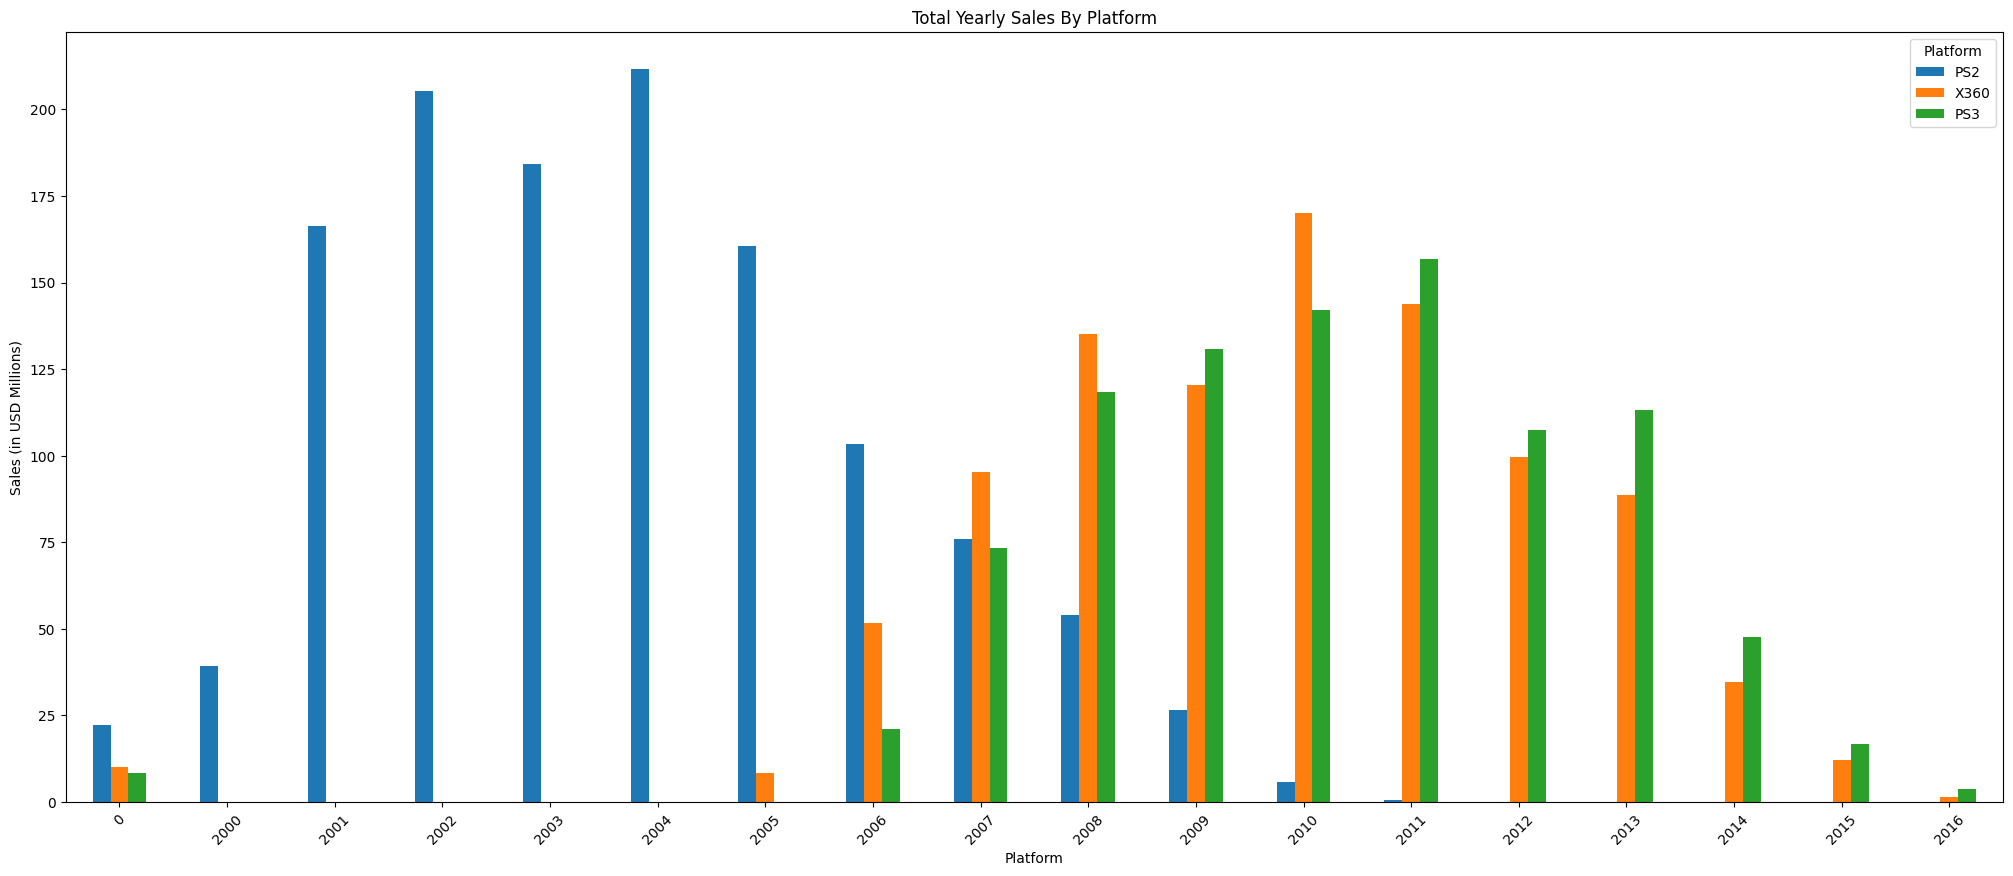

In [10]:
# Create data frame that groups the sum of total sales by platform and year
sales_by_top_three_platforms = games[games['platform'].isin(['PS2','X360','PS3'])].groupby(['year_of_release','platform'])['total_sales'].sum().to_frame('yearly_sales_by_platform').reset_index()


pivot_sales_by_top_three_platforms = sales_by_top_three_platforms.pivot(index='year_of_release', columns='platform', values='yearly_sales_by_platform').reset_index()


# Create a bar chart that shows the sales by platform 
pivot_sales_by_top_three_platforms.plot(x = 'year_of_release'
                                       , y = ['PS2','X360','PS3']
                                       , title = 'Total Yearly Sales By Platform'
                                       , xlabel = 'Platform'
                                       , ylabel = 'Sales (in USD Millions)'
                                       , kind = 'bar'
                                       , rot = 45
                                       , figsize=(25,10)
                                       )

# Change legend/series titles
plt.legend(title='Platform')

# Show bar chart
plt.show() 

The PlayStation 2 was dominant in sales between 2000 and 2005, however, with the release of the PlayStation 3 and Xbox 360 in 2006, sales of PS2 games quickly declined in favor of the new platforms.

### Find platforms that used to be popular but now have zero sales.

We can ask ourselves: "How do you define platforms that used to be popular"?

My approach:
- Take the top 10 highest grossing platforms and call those the "popular platforms"
- Using those platforms, determine yearly sales for each platform
- Get the first and last years the platform had sales
- If the platform still has sales in 2016, exclude from analysis because there still may be sales of the platform
- If last year of sales is before 2016 then assume sales are now 0
- Exclude year_of_release = 0  because year 0 refers to unknown sales data

In [11]:
# Create list of sales by platform to determine popularity (same as in section 4.2 above)
sales_by_platform = games.groupby('platform')['total_sales'].sum().to_frame('total_sales_by_platform').sort_values(by=['total_sales_by_platform'], ascending=False).reset_index()

# Select top 10 highest grossing platforms - these are considered to be popular
popular_platforms = sales_by_platform['platform'].head(10)

# Get sales by each year for every platform, excluding those with unknown sales (year_of_release = 0)
yearly_sales_by_platform = games[games['year_of_release']!=0].groupby(['year_of_release','platform'])['total_sales'].sum().to_frame('yearly_sales').reset_index()

# Get the first year the platform was seen and sales amount 
first_seen = yearly_sales_by_platform.groupby(['platform']).min('year_of_release').reset_index()

# Get the last year the platform was seen and sales amount 
last_seen = yearly_sales_by_platform[['platform','year_of_release']].groupby(['platform']).max('year_of_release').reset_index()

# Get the year the platform had the most sales 
max_sales_by_platform = yearly_sales_by_platform.groupby(['platform'])['yearly_sales'].max().to_frame().reset_index()
peak_sales = max_sales_by_platform.merge(yearly_sales_by_platform, on = ['platform','yearly_sales'])

# Merge data sets to get history of platform to do calculations on 
# First merge first seen and last seen
first_and_peak = first_seen.merge(last_seen, on = 'platform', suffixes=('_first_seen', '_last_seen'))

# Next merge last seen to and peak sales and first seen
first_peak_last = first_and_peak.merge(peak_sales, on = 'platform', suffixes=(None, '_peak'))

In [12]:
# Find platforms that used to be popular but now have zero sales

# Filter down all platforms to the ones that were most popular 
popular_platform_history = first_peak_last.query('platform in @popular_platforms')

# Filter for platforms that no longer have sales 
no_more_sales = popular_platform_history[popular_platform_history['year_of_release_last_seen'] < 2016]['platform'].unique()

# Print platforms that were popular but no longer have sales
print('These are the platforms that were once top grossing platforms but no longer have sales in 2016 -',no_more_sales)

These are the platforms that were once top grossing platforms but no longer have sales in 2016 - ['DS' 'GBA' 'PS' 'PS2' 'PSP']


Based on the assumptions above, the platforms that were once popular but now have zero sales are as follows:
- DS
- Gameboy Advance
- PlayStation
- PlayStation 2
- PlayStation Portable (PSP)
- Xbox

### How long does it generally take for new platforms to appear and old ones to fade?
Assumptions for answering these questions:

For each platform first get the following information:
- First year the platform had sales
- When the platform had its highest sales
- The last year the platform had sales

To answer how long does it take for new platforms to appear:
- Calculate average years from platform inception to peak sales

To answer how long does it take for new platforms to appear:
- Calculate average years from platform peak sales to the last year sales were seen
- Exlcude year_of_release = 0  because year 0 captures unknown sales

In [13]:
# For each platform, calculate the difference from when the platform was first released 
first_peak_last['first_to_peak_years'] = first_peak_last['year_of_release'] - first_peak_last['year_of_release_first_seen']

# For each platform, calculate the difference from when the platform peaked to when it last had sales
first_peak_last['peak_to_last_years'] = first_peak_last['year_of_release_last_seen'] - first_peak_last['year_of_release'] 

# Calculate the average time for new platforms to peak (inception to peak)
avg_appear = first_peak_last['first_to_peak_years'].mean()

# Calculate the average time for new platforms to fade (peak to year of final sales)
avg_fade = first_peak_last['peak_to_last_years'].mean()

# Print results 
print('On average, it takes', round(avg_appear,2), 'years from when a new platform is launched to when it generates its max revenue.')
print('On average, it takes', round(avg_fade,2), 'years from when a platform generates its max revenue to when it no longer generates revenue.')

On average, it takes 3.39 years from when a new platform is launched to when it generates its max revenue.
On average, it takes 4.23 years from when a platform generates its max revenue to when it no longer generates revenue.


### Data filtering moving forward

We now have enough insight to determine what time period to look at for further analysis, specifically as it relates to a campaign for 2017.

Given that it takes on average 3.32 years from platform release date to a plaform's peak revenue, the platforms I will consider working with for the analysis will have a platform release date after 2013. Those released 2013 and earlier will be disregarded in the next sections.

In [14]:
# Create a filtered down data set that only has platforms with a release date of 2014 and later
games_filtered = games[games['year_of_release'] >= 2014]

### Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

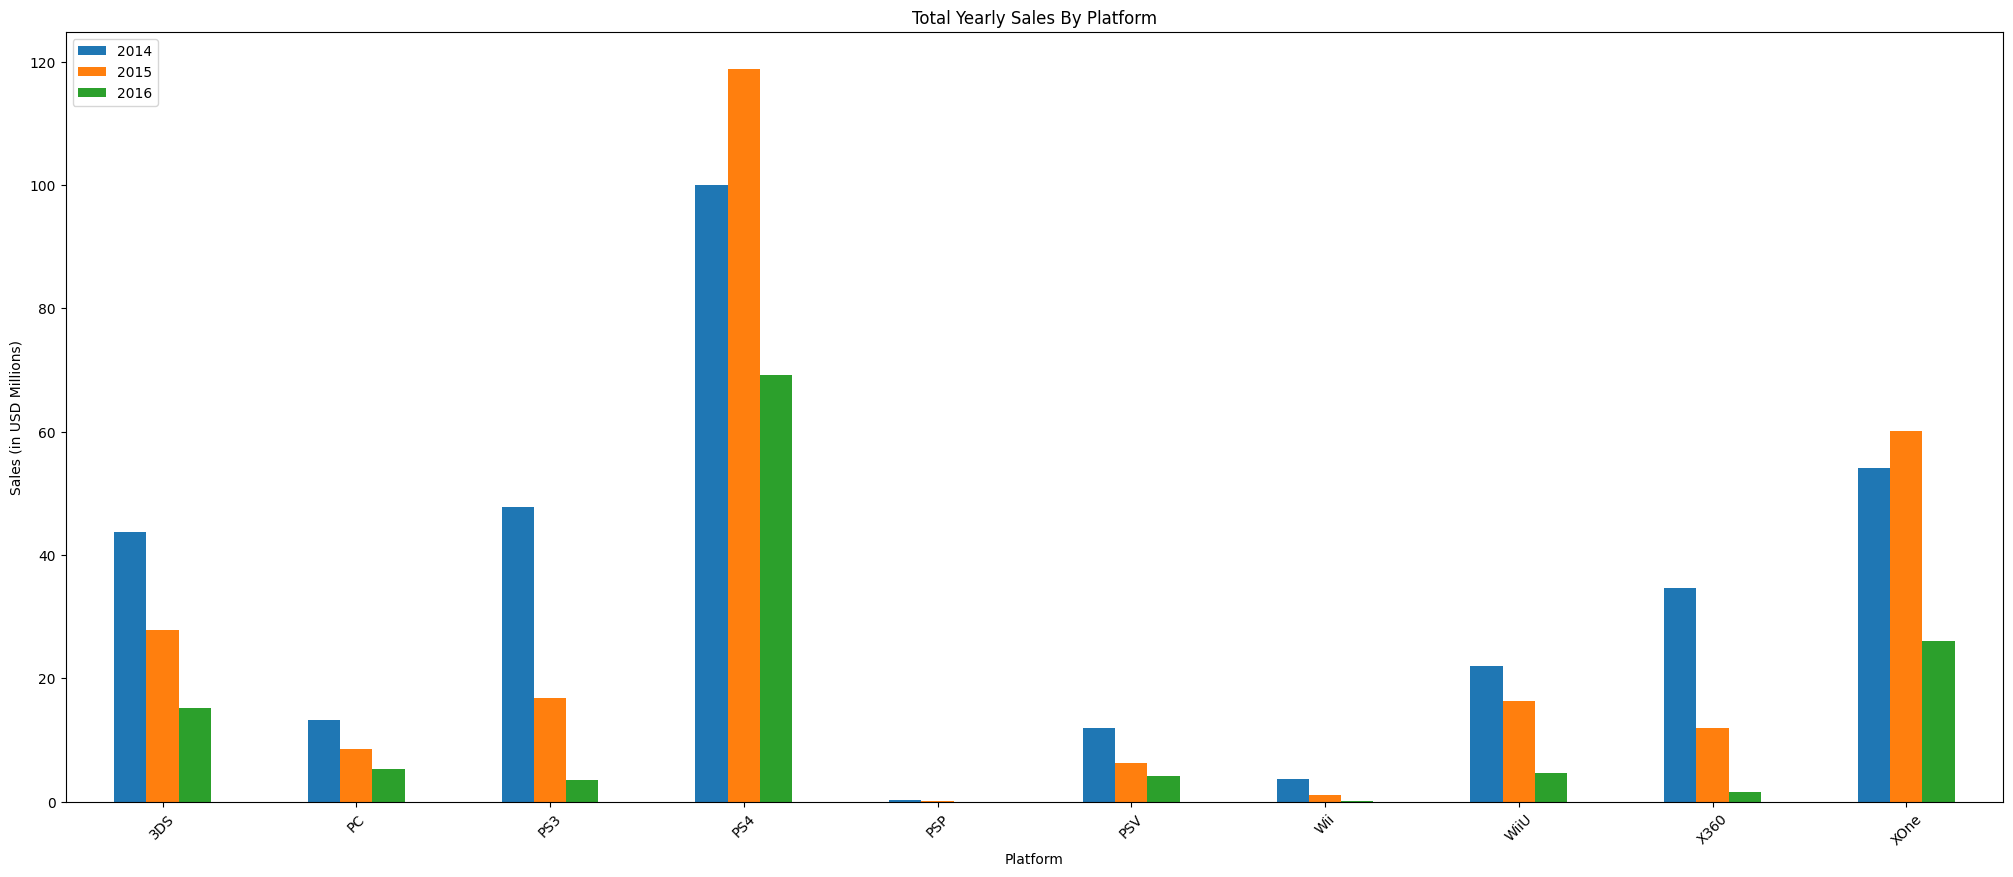

In [15]:
# Using the filtered games list for sales in or after 2014, sum total sales by platform 
yearly_game_sales = games_filtered.groupby(['year_of_release','platform'])['total_sales'].sum().to_frame('yearly_sales').reset_index()

# Pivot yearly sales data so that platform is x-axis and columns represent each year to set up data for grouped bar chart
pivot_sales_by_platforms = yearly_game_sales.pivot(index='platform', columns='year_of_release', values='yearly_sales').reset_index()

# Create a bar chart that shows the sales by platform 
pivot_sales_by_platforms.plot(x = 'platform'
                                       , y = [2014,2015,2016]
                                       , title = 'Total Yearly Sales By Platform'
                                       , xlabel = 'Platform'
                                       , ylabel = 'Sales (in USD Millions)'
                                       , kind = 'bar'
                                       , rot = 45
                                       , figsize=(25,10)
                                       )
# Plot legend
plt.legend(loc="upper left")

# Show bar chart
plt.show() 

All sales for 2016 appear to be down compared to 2015, but this might be because we don't have a full view of 2016 yet. Given this assumption, I would say that it's safe to believe that sales might be growing and/or profitable for the PS4 and Xbox One because sales are up in 2015 compared to 2014. This might be because the platforms are more newly released compared to their predecessors like the Xbox One or PS3. In terms of selecting profitable platforms, I would select the PS4 and the Xbox One, and if I needed one additional from another manufacturer, I would select the Nintendo 3DS.

### Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

Text(0.5, 0, 'Platform')

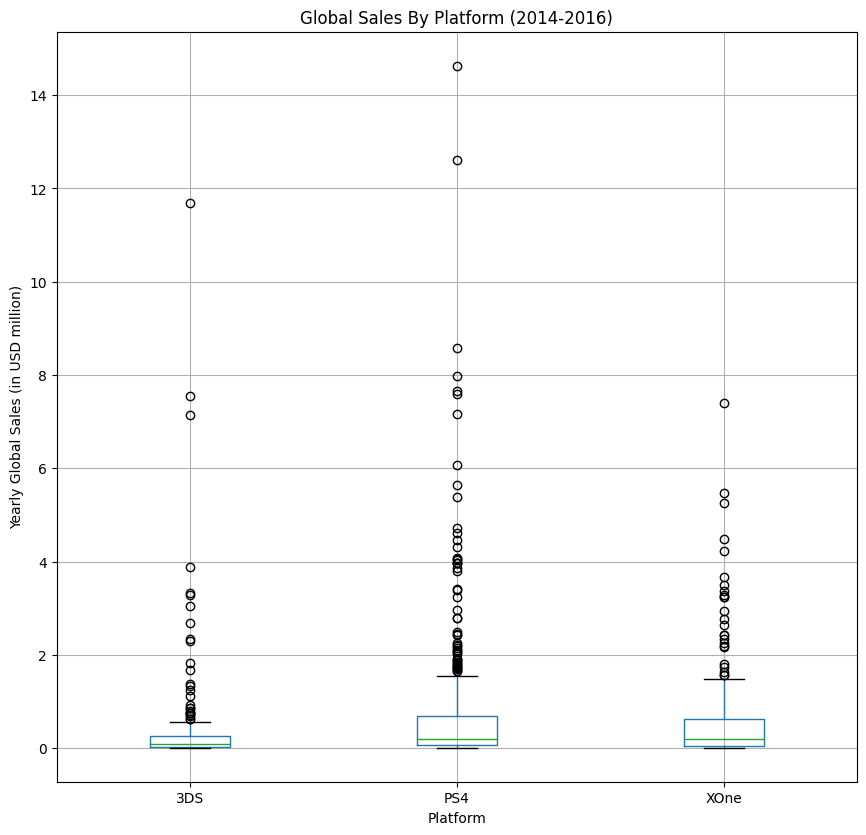

In [16]:
# Create dataframe of platform and sales regardless or year and game name filtered down to Xbox One, ps4, and 3DS
box_plot_data = games_filtered.query("platform in ['3DS','PS4','XOne']")[['platform','total_sales']].reset_index(drop=True)

# Create boxplot of sales by platform 
box_plot_data.boxplot(by='platform',figsize=(10,10))

# Configure naming
plt.title('Global Sales By Platform (2014-2016)')
plt.suptitle(None)
plt.ylabel('Yearly Global Sales (in USD million)')
plt.xlabel('Platform')

While the median sales for games across all platforms between 2014 and 2016 are similiar, PS4 and Xbox have games sold with higher yearly sales when looking at quartile three and maximum values that are not outliers. The 3DS has more higher grossing outliers than the PS4 and Xbox One, and I would imagine that these are due to popular platform games like Mario or Zelda.

### Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

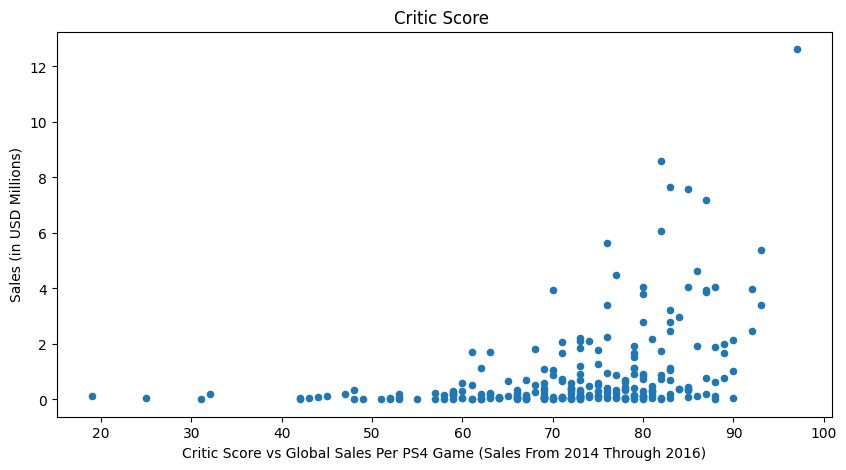

The correlation between critic score and total sales for the PS4 between 2014 through 2016 is: 0.403


In [17]:
# I'm going to analyze PS4 sales from 2014-2016
# I will build a scatter plot and calculate the correlation between reviews and sales

PS4_filtered = games_filtered[(games_filtered['platform'] == 'PS4') & (games_filtered['critic_score'] > 0)][['critic_score','total_sales']].reset_index(drop=True)

# Create a bar chart that shows the sales by platform 
PS4_filtered.plot(x = 'critic_score'
                  , y = 'total_sales'
                  , title = 'Critic Score '
                  , xlabel = 'Critic Score vs Global Sales Per PS4 Game (Sales From 2014 Through 2016)'
                  , ylabel = 'Sales (in USD Millions)'
                  , kind = 'scatter'
                  , rot = 0
                  , figsize=(10,5)
                  )
# Show bar chart
plt.show() 

# Calculate the correlation between reviews and sales
correlation = PS4_filtered['critic_score'].corr(PS4_filtered['total_sales'])

# Print correlation between the two columns
print('The correlation between critic score and total sales for the PS4 between 2014 through 2016 is:', round(correlation,3))

A correlation coefficient between .39 and .59 represents a moderate positive correlation between critic score and game sales. Since there is a positive correlation between critic scores and sales, any games with a high critic score should be advertised to help drive sales.

### Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

,genre,sum,count
0,Action,199.36,619
1,Shooter,170.94,128
2,Sports,109.48,161
3,Role-Playing,101.44,221
4,Misc,37.55,113
5,Fighting,28.22,60
6,Racing,27.52,69
7,Platform,18.09,38
8,Adventure,17.55,185
9,Simulation,13.13,44


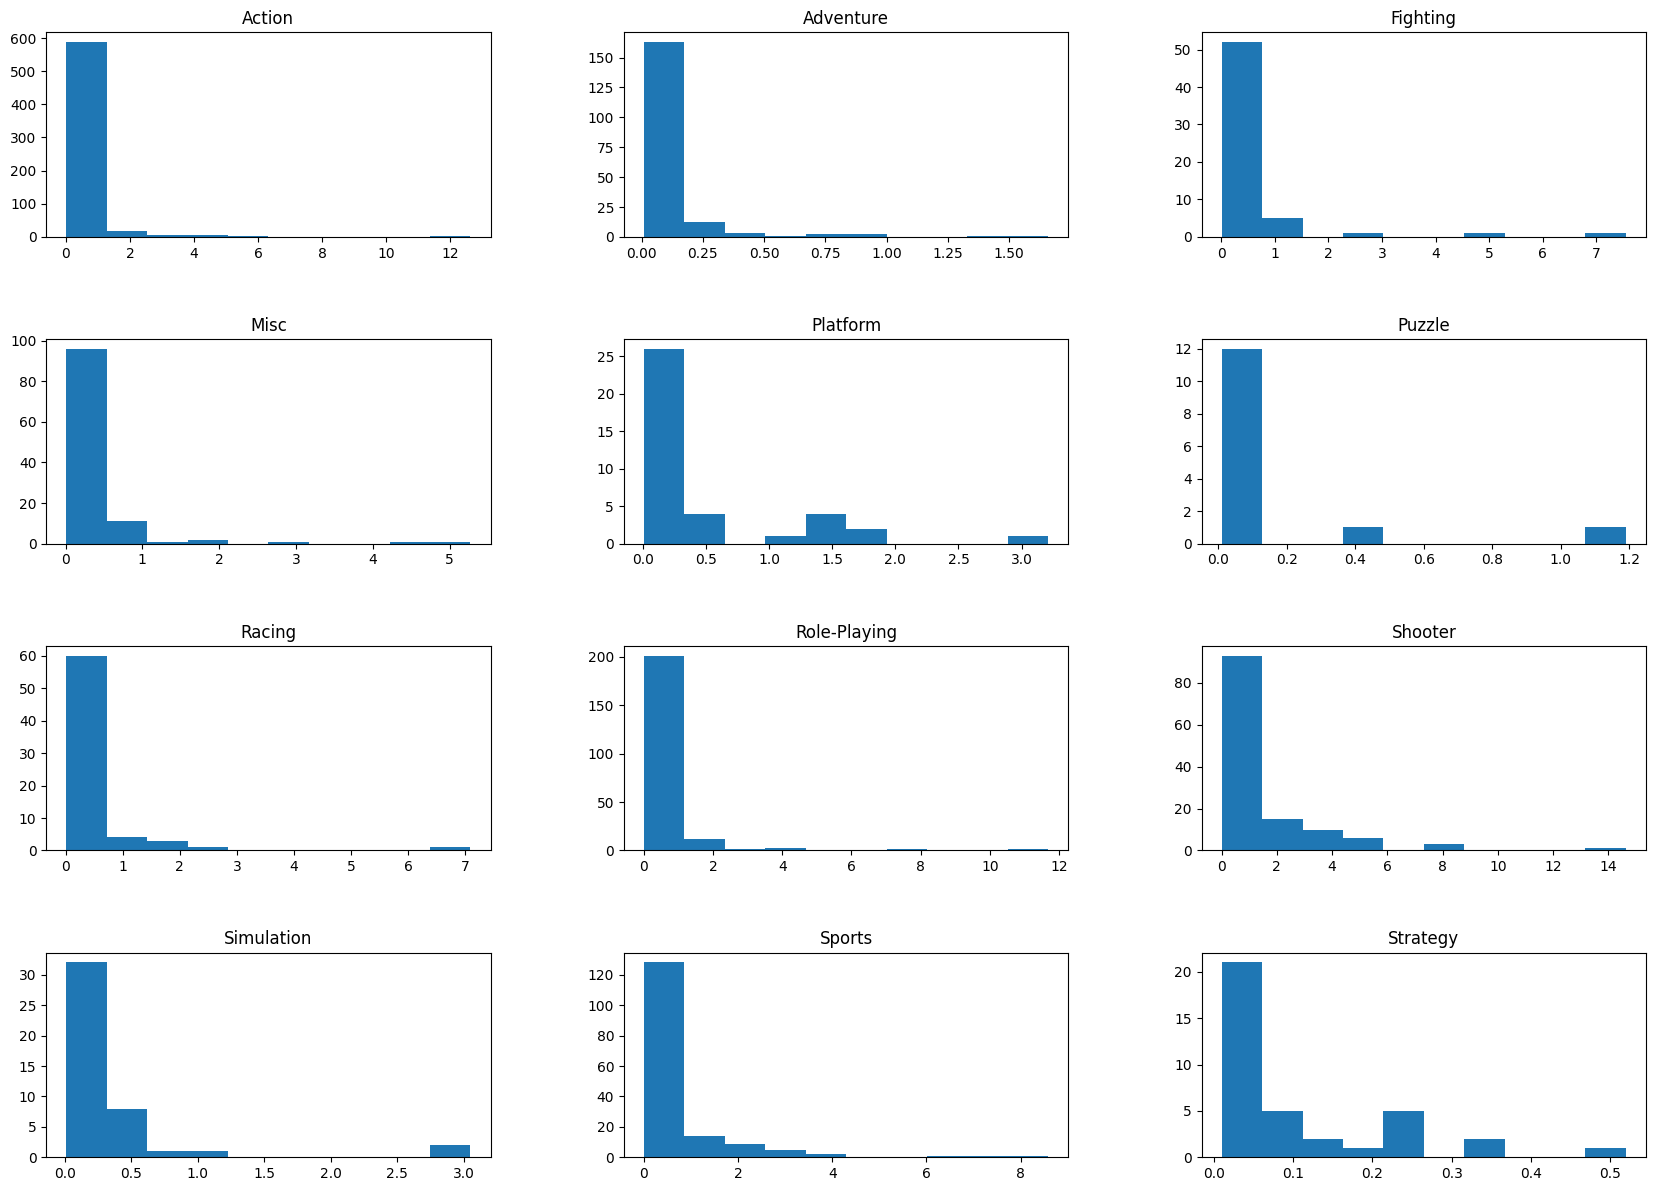

In [18]:
# Create a dataframe of genre and total sales 
genre_grouped = games_filtered[['genre','total_sales']].sort_values(by='genre')

# Create a histogram for each genre
# y-axis is count of games and x-axis is distribution of sales within genre
genre_grouped['total_sales'].hist(by = genre_grouped['genre']
                                  , figsize=(20, 15)
                                  , rot = 0
                                  )

# Create an aggregation of game count and sales within each genre just to validate what is displayed in histogram
genre_grouped.groupby('genre').agg(['sum', 'count']).droplevel(axis=1, level=0).sort_values(by = 'sum', ascending = False).reset_index()

*In the plots above, the x-axis represents USD sales in millions and the y-axis represents the count of games in the genre.*

When looking at the general distribution of games by genre, the profitability of the genre can be achieved in different ways. For example, the top two most profitable genres are Action and Shooters. When you look at the distribution of games and sales for these genres, you'll see that the action has over 600 games compared the 128 games in the Shoorters category. This means, on average, shooters generated more sales than action games. Lastly, genres with higher total sales tend to have more games then lower sales generating genres. The top 5 highest grossing genres have over 1,200 games, however the remaining 7 genres have just over 400 games.

## Create a user profile for each region. For each region (NA, EU, JP), determine the following

### What are the top five platforms? Describe variations in their market shares from region to region.

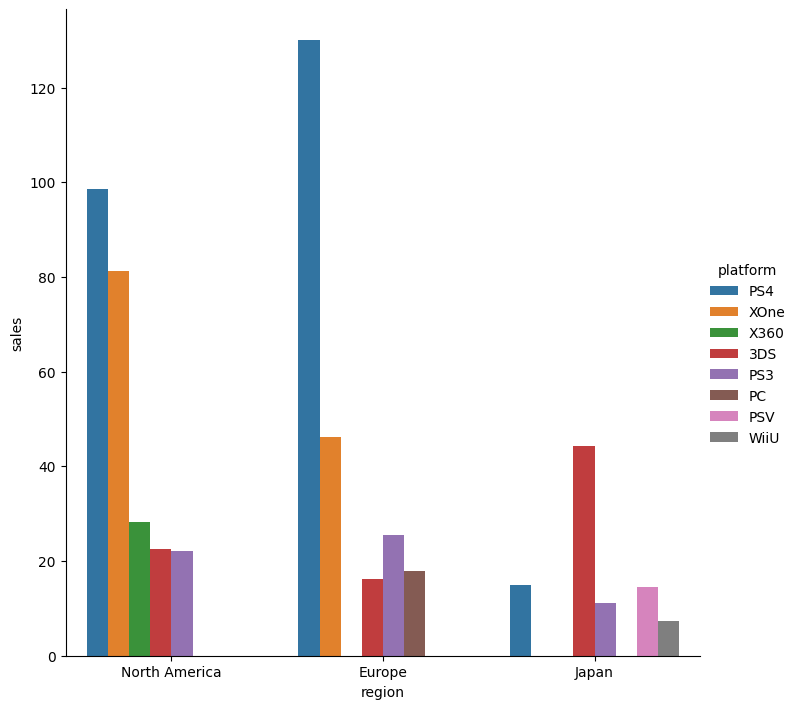

In [19]:
# Create a dataframe with regional sales for each platform for sales after 2014
regional_platform_sales = games_filtered.groupby('platform')[['na_sales','eu_sales','jp_sales']].sum().reset_index()

# Get the top 5 platforms for each region
na_platform = regional_platform_sales[['platform','na_sales']].sort_values('na_sales', ascending = False).head(5).reset_index(drop=True)
eu_platform = regional_platform_sales[['platform','eu_sales']].sort_values('eu_sales', ascending = False).head(5).reset_index(drop=True)
jp_platform = regional_platform_sales[['platform','jp_sales']].sort_values('jp_sales', ascending = False).head(5).reset_index(drop=True)

# Create a column called region and fill with the region
na_platform['region'] = 'North America'
eu_platform['region'] = 'Europe'
jp_platform['region'] = 'Japan'

# Replace column names to just sales for each region 
na_platform.rename(columns={'na_sales':'sales'}, inplace=True)
eu_platform.rename(columns={'eu_sales':'sales'}, inplace=True)
jp_platform.rename(columns={'jp_sales':'sales'}, inplace=True)

# Union of all platfrom sales together
all_region_platform_sales = pd.concat([na_platform,eu_platform,jp_platform])

# Tried several ways to visualize this and attempted something new using seaborn catplot
# I wanted to show platform sales by region in descending order of sales to show the differences in platform popularity amongst regions
# Result shows some null values but insights can still be derived
sns.catplot(data=all_region_platform_sales, x="region", y="sales", kind="bar", hue='platform', height=7)

When looking at top grossing platforms, region to region, we see that in Europe and North America, the PS4 and Xbox One are the most popular consoles. North America prefers the Xbox 360 over the PC, which Europe favors. Unlike Europe and North America, Japan's highest grossing platform is the 3DS following by the PS4 and PSV.

### What are the top five genres? Explain the difference.

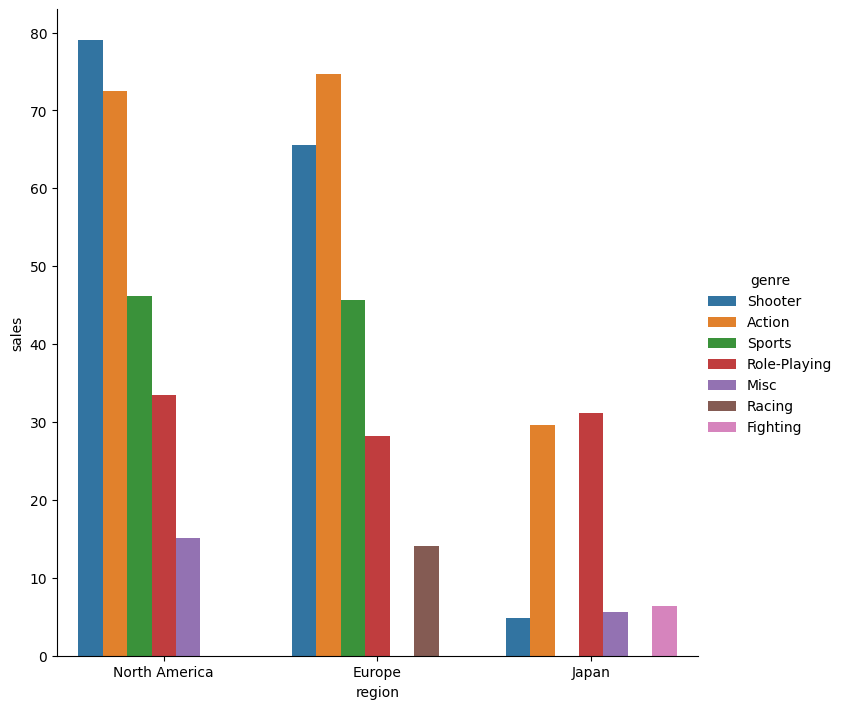

In [20]:
# Create a dataframe with regional sales for each genre for sales after 2014
regional_genre_sales = games_filtered.groupby('genre')[['na_sales','eu_sales','jp_sales']].sum().reset_index()

# Get the top 5 genres for each region
na_genre = regional_genre_sales[['genre','na_sales']].sort_values('na_sales', ascending = False).head(5).reset_index(drop=True)
eu_genre = regional_genre_sales[['genre','eu_sales']].sort_values('eu_sales', ascending = False).head(5).reset_index(drop=True)
jp_genre = regional_genre_sales[['genre','jp_sales']].sort_values('jp_sales', ascending = False).head(5).reset_index(drop=True)

# Create a column called region and fill with the region
na_genre['region'] = 'North America'
eu_genre['region'] = 'Europe'
jp_genre['region'] = 'Japan'

# Replace column names to just sales for each region 
na_genre.rename(columns={'na_sales':'sales'}, inplace=True)
eu_genre.rename(columns={'eu_sales':'sales'}, inplace=True)
jp_genre.rename(columns={'jp_sales':'sales'}, inplace=True)

# Union all genres sales together
all_region_genre_sales = pd.concat([na_genre,eu_genre,jp_genre])

# Add comment
sns.catplot(data=all_region_genre_sales, x="region", y="sales", kind="bar", hue='genre', height=7)

In North America, the highest grossing genres are similiar to those in Europe: Shooters, Action, Sports, and Role-Playing. In Japan, the top genres by sales are Role-Playing and Action.

### Do ESRB ratings affect sales in individual regions?

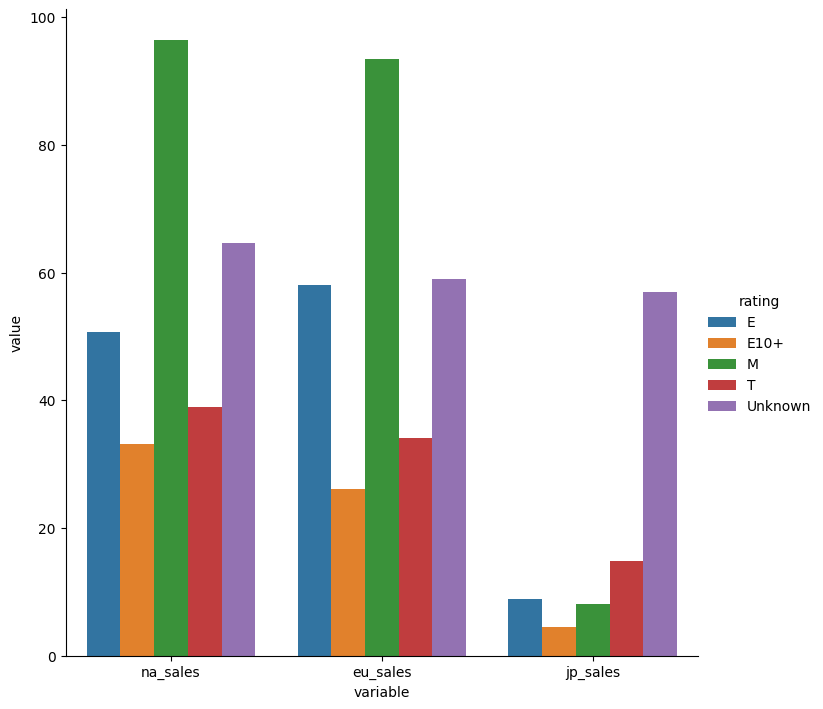

In [21]:
# Create a dataframe of rating and total sales by region
esrb_regional_sales = games_filtered.groupby('rating')[['na_sales','eu_sales','jp_sales']].sum().reset_index()

# Pivot the esrb_regional_sales data to get data in format for bar chart
pivoted_esrb_regional_sales = pd.melt(esrb_regional_sales, value_vars =['na_sales','eu_sales','jp_sales'], id_vars = 'rating' )

# Create a bar chart that plots ESRB sales by region
sns.catplot(data=pivoted_esrb_regional_sales, x="variable", y="value", kind="bar", hue='rating', height=7)

ESRB ratings do affect sales in different regions. From what we can see in the data, it appears as if Japan doesn't rate their games on the ESRB scale due to the fact that so many of Japanese games have 'Unknown' as its rating. Both Europe and North America have high sales for games in the Mature and Everybody rating categories

## Testing statistical hypotheses

### Average user ratings of the Xbox One and PC platforms are the same

In [22]:
# Null Hypothesis - "There is no difference in average user ratings of the Xbox One and PC platforms"
# Alternative Hypothesis - "There is a difference in average user ratings of the Xbox One and PC platforms"

# Get Xbox One Ratings Where User Score is Greater Than 0
# Remove user_scores of 0 because I set user score of 0 to be the value when user score is missing
xbox_one_ratings = games_filtered[(games_filtered['user_score'] > 0) & (games_filtered['platform'] == 'XOne')]['user_score']

# Get PC Ratings Where User Score is Greater Than 0
# Remove user_scores of 0 because I set user score of 0 to be the value when user score is missing
pc_ratings = games_filtered[(games_filtered['user_score'] > 0) & (games_filtered['platform'] == 'PC')]['user_score']

# Print the number of values in each list to see if there is a similiarly equal and large enough sample size
print('The number of Xbox One ratings is:', len(xbox_one_ratings))
print('The number of PC ratings is:', len(pc_ratings))

# I was getting errors with the data type for t-test so I had to convert from object to float
xbox_one_ratings = np.array(xbox_one_ratings, dtype=float)
pc_ratings = np.array(pc_ratings, dtype=float)

# Confirming the data switched from object to float
print(np.array(xbox_one_ratings).dtype)
print(np.array(pc_ratings).dtype)

# Critical statistical significance level
# If the p-value is less than alpha, we reject the hypothesis
alpha = 0.05  

# In order to test the hypothesis that the means of the two statistical populations are equal based on samples taken from them, apply the independent t-test 
results = st.ttest_ind(xbox_one_ratings, pc_ratings)

print('p-value: ', results.pvalue)
print('The average user rating for the Xbox One is',round(xbox_one_ratings.mean(),2))
print('The average user rating for the PC is',round(pc_ratings.mean(),2))

if results.pvalue < alpha:
    print("We reject the null hypothesis - There is a difference in average user rating for the Xbox One and PC platforms.")
else:
    print("We can't reject the null hypothesis - There is no difference in average user rating for the Xbox One and PC platforms.") 

The number of Xbox One ratings is: 165
The number of PC ratings is: 122
float64
float64
p-value:  0.10450507919348478
The average user rating for the Xbox One is 65.95
The average user rating for the PC is 62.98
We can't reject the null hypothesis - There is no difference in average user rating for the Xbox One and PC platforms.


### Average user ratings for the Action and Sports genres are different

In [23]:
# Null Hypothesis: "There is no difference in average user ratings of the Action and Sports genres"
# Alternative Hypothesis: "There is a difference in average user ratings of the Action and Sports genres"

# Get Action Ratings Where User Score is Greater Than 0
# Remove user_scores of 0 because I set user score of 0 to be the value when user score is missing
action_ratings = games_filtered[(games_filtered['user_score'] > 0) & (games_filtered['genre'] == 'Action')]['user_score']

# Get Sports Ratings Where User Score is Greater Than 0
# Remove user_scores of 0 because I set user score of 0 to be the value when user score is missing
sports_ratings = games_filtered[(games_filtered['user_score'] > 0) & (games_filtered['genre'] == 'Sports')]['user_score']

# Print the number of values in each list to see if there is a similiarly equal and large enough sample size
print('The number of Action genre ratings is:', len(action_ratings))
print('The number of Sports genre ratings is:', len(sports_ratings))

# I was getting errors with the data type for t-test so I had to convert from object to float
action_ratings = np.array(action_ratings, dtype=float)
sports_ratings = np.array(sports_ratings, dtype=float)

# Confirming the data switched from object to float
print(np.array(action_ratings).dtype)
print(np.array(sports_ratings).dtype)

# Critical statistical significance level
# If the p-value is less than alpha, we reject the hypothesis
alpha = 0.05  

# In order to test the hypothesis that the means of the two statistical populations are equal based on samples taken from them, apply the independent t-test 
results = st.ttest_ind(action_ratings, sports_ratings)

print('p-value: ', results.pvalue)
print('The average user rating for the Action genre is',round(action_ratings.mean(),2))
print('The average user rating for the Sports genre is',round(sports_ratings.mean(),2))

if results.pvalue < alpha:
    print("We reject the null hypothesis - There is a difference in average user rating of the Action and Sports genres.")
else:
    print("We can't reject the null hypothesis - There is a difference in average user rating of the Action and Sports genres.") 

The number of Action genre ratings is: 297
The number of Sports genre ratings is: 127
float64
float64
p-value:  2.871114798510669e-19
The average user rating for the Action genre is 67.61
The average user rating for the Sports genre is 52.25
We reject the null hypothesis - There is a difference in average user rating of the Action and Sports genres.


## Conclusion

Recall that it's December 2016 and I'm planning a video game advertising campaign for 2017. From my analysis of video game sales data from 2014 through 2016, I have a few important takeaways that I think will help my business sell more games in 2017 based on what we've historically seen in the past few years:

- The platforms with high sales and popularity going into 2017 are the 3DS, PS4, and Xbox One.
- In North America, the highest grossing genres are similiar to those in Europe: Shooters, Action, Sports, and Role-Playing.
- In Japan, the top genres by sales are Role-Playing and Action. 
- Games with E or M ratings tend to have higher sales compared to games with other ESRB ratings.
- There is a moderate positive correlation (r = 0.403) between critic score and sales for the PS4. It would be beneficial to check if this holds true across other platforms to ensure awareness of any high critic scores.

With these insights, I recommend optimizing the 2017 advertising campaign by prioritizing the following:
- Platforms: 3DS, PlayStation 4, Xbox One
- Genres (North America, Europe): Shooter, Action, Sports, Role-Playing
- Genres (Japan): Action, Role-Playing
- ESRB Rating: E, M
- Critic Score: Prioritize higher scores (at least for PS4 games)

By prioritizing the above areas, thereby adjusting to market trends, I believe the Ice online store will be able to maximize sales in 2017.